In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('./user_taggedmovies.dat',sep="\s+", )
df

,userID,movieID,tagID,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,353,5290,29,10,2006,23,20,15
1,78,4223,5264,16,4,2007,4,43,45
2,127,1343,1544,28,8,2007,3,42,27
3,127,1343,12330,28,8,2007,3,42,27
4,127,2080,1451,28,8,2007,3,42,47
...,...,...,...,...,...,...,...,...,...
47952,71534,7937,306,3,12,2007,3,7,14
47953,71534,8848,331,3,12,2007,3,6,19
47954,71534,8848,427,3,12,2007,3,6,27
47955,71534,25833,7671,3,12,2007,3,7,31


In [11]:
df.loc[:,'timestamps'] = df.date_year.astype('str')+'_'+ df.date_month.astype('str')+'_'+ df.date_day.astype('str')+'_'+ \
df.date_hour.astype('str')+'_'+df.date_minute.astype('str')+'_'+df.date_second.astype('str')

df.loc[:,'timestamps'] = df.loc[:,'timestamps'].apply(pd.to_datetime,format='%Y_%m_%d_%H_%M_%S')
df['dayofweek_num']=df['timestamps'].dt.dayofweek  
df['weekofyear']=df['timestamps'].dt.weekofyear
df['quarter']=df['timestamps'].dt.quarter
df['days_in_month']=df['timestamps'].dt.days_in_month
df['is_month_start']=df['timestamps'].dt.is_month_start
df['is_month_end']=df['timestamps'].dt.is_month_end
df['is_quarter_start']=df['timestamps'].dt.is_quarter_start
df['is_quarter_end']=df['timestamps'].dt.is_quarter_end
df['is_year_start']=df['timestamps'].dt.is_year_start
df['is_year_end']=df['timestamps'].dt.is_year_end
df['is_leap_year']=df['timestamps'].dt.is_leap_year

In [5]:
df.userID.nunique(),df.movieID.nunique()

(2113, 5908)

In [ ]:
# SimHash

# PCA

## All time data pca
(attributes manually added)

In [12]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = df_selected.iloc[:,3:]
cols = df_selected.columns
df_selected

,date_day,date_month,date_year,date_hour,date_minute,date_second,dayofweek_num,weekofyear,quarter,days_in_month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year
0,29,10,2006,23,20,15,6,43,4,31,False,False,False,False,False,False,False
1,16,4,2007,4,43,45,0,16,2,30,False,False,False,False,False,False,False
2,28,8,2007,3,42,27,1,35,3,31,False,False,False,False,False,False,False
3,28,8,2007,3,42,27,1,35,3,31,False,False,False,False,False,False,False
4,28,8,2007,3,42,47,1,35,3,31,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47952,3,12,2007,3,7,14,0,49,4,31,False,False,False,False,False,False,False
47953,3,12,2007,3,6,19,0,49,4,31,False,False,False,False,False,False,False
47954,3,12,2007,3,6,27,0,49,4,31,False,False,False,False,False,False,False
47955,3,12,2007,3,7,31,0,49,4,31,False,False,False,False,False,False,False


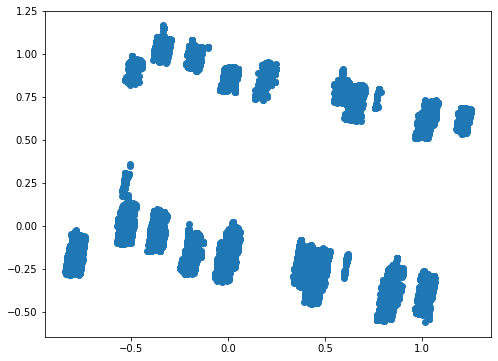

In [14]:
# instance level
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
df_selected = pd.DataFrame(df_selected)
df_selected.columns = cols
# scaler.inverse_transform(df_selected)

vectors = PCA(n_components=2).fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1]) # user

### PCA result analysis

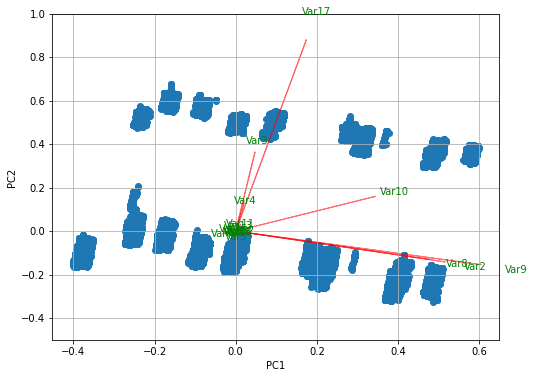

In [ ]:
# https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(df_selected)
df_selected = scaler.transform(df_selected)    

pca = PCA()
x_new = pca.fit_transform(df_selected)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley) # c = y 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
# plt.xlim(-1,1)
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.30573866, 0.13857541])

In [ ]:
pca.components_

array([[ 1.07091652e-02,  5.12812900e-01,  4.71044614e-02,
         1.93923310e-02,  9.73887963e-04, -5.23078471e-04,
        -2.80068987e-02,  4.75152141e-01,  6.00944295e-01,
         3.40918063e-01,  1.09310664e-02,  1.02166365e-02,
         5.59405946e-03,  5.04748078e-03, -3.67042788e-03,
         4.77088891e-03,  1.73442040e-01],
       [-2.97427789e-03, -1.40894918e-01,  3.60125459e-01,
         1.20489254e-01, -2.30357049e-02, -2.85427435e-03,
        -1.08611523e-02, -1.29245532e-01, -1.53473176e-01,
         1.58099275e-01,  2.77193602e-02,  2.35685866e-03,
         2.29400846e-02, -4.67052443e-03,  8.18319096e-03,
        -3.67424796e-03,  8.76709055e-01]])

In [ ]:
pca.components_

array([[ 1.07091652e-02,  5.12812900e-01,  4.71044614e-02,
         1.93923310e-02,  9.73887963e-04, -5.23078471e-04,
        -2.80068987e-02,  4.75152141e-01,  6.00944295e-01,
         3.40918063e-01,  1.09310664e-02,  1.02166365e-02,
         5.59405946e-03,  5.04748078e-03, -3.67042788e-03,
         4.77088891e-03,  1.73442040e-01],
       [-2.97427789e-03, -1.40894918e-01,  3.60125459e-01,
         1.20489254e-01, -2.30357049e-02, -2.85427435e-03,
        -1.08611523e-02, -1.29245532e-01, -1.53473176e-01,
         1.58099275e-01,  2.77193602e-02,  2.35685866e-03,
         2.29400846e-02, -4.67052443e-03,  8.18319096e-03,
        -3.67424796e-03,  8.76709055e-01]])

In [ ]:
# get the most important features on the PCs 
n_pcs= pca.components_.shape[0] # 2

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = cols
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_pca = pd.DataFrame(dic.items())
df_pca

,0,1
0,PC0,quarter
1,PC1,is_leap_year
2,PC2,date_hour
3,PC3,dayofweek_num
4,PC4,days_in_month
5,PC5,date_minute
6,PC6,date_second
7,PC7,date_day
8,PC8,is_month_start
9,PC9,is_month_end


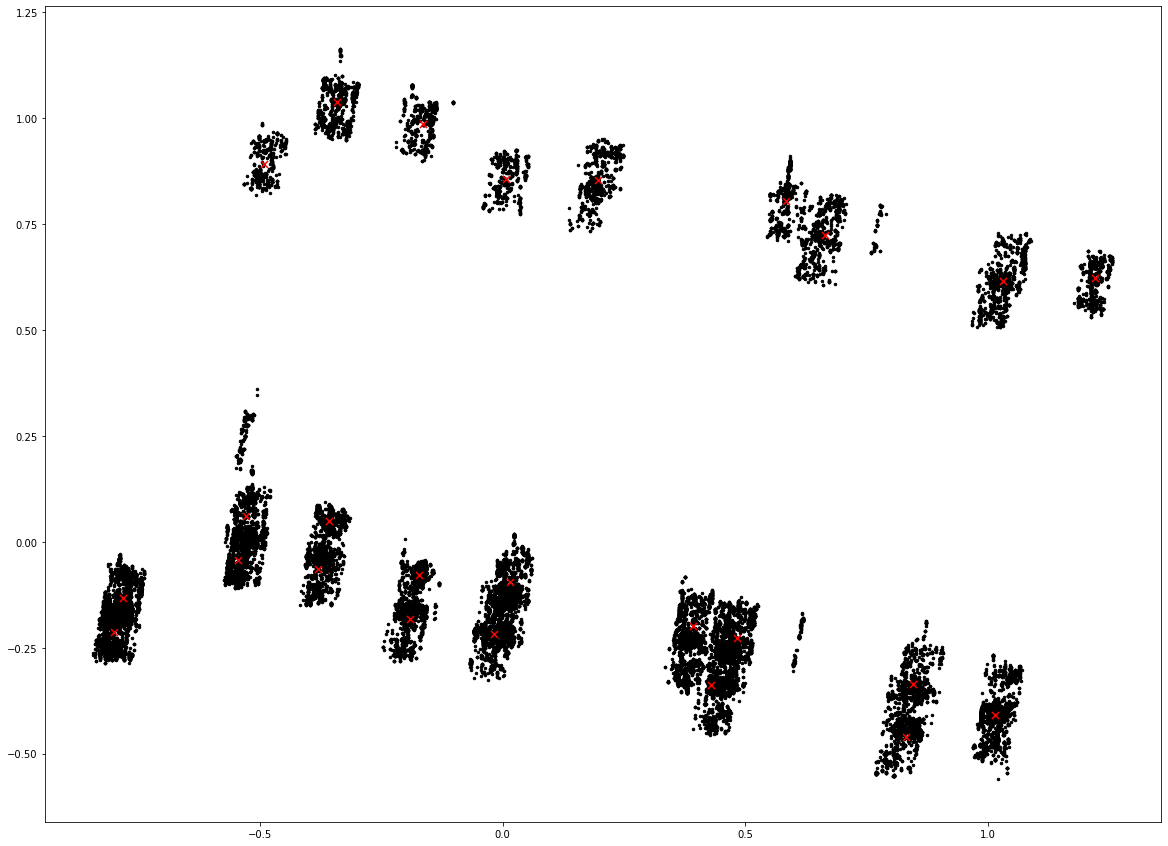

In [ ]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (20, 15)

plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
# plt.title('K-means clustering on the TSFresh Features (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
plt.show()


In [ ]:
# df_selected = pd.DataFrame(df_selected)
# df_selected.columns = cols
# df_selected['cluster'] = label_pred
# df_selected = pd.concat([df.iloc[:,:3],df_selected], axis=1)
# df_selected.head()

,userID,movieID,tagID,date_day,date_month,date_year,date_hour,date_minute,date_second,dayofweek_num,weekofyear,quarter,days_in_month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year,cluster
0,75,353,5290,0.933333,0.818182,0.25,1.000000,0.338983,0.254237,1.000000,0.823529,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
1,78,4223,5264,0.500000,0.272727,0.50,0.173913,0.728814,0.762712,0.000000,0.294118,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
2,127,1343,1544,0.900000,0.636364,0.50,0.130435,0.711864,0.457627,0.166667,0.666667,0.666667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
3,127,1343,12330,0.900000,0.636364,0.50,0.130435,0.711864,0.457627,0.166667,0.666667,0.666667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
4,127,2080,1451,0.900000,0.636364,0.50,0.130435,0.711864,0.796610,0.166667,0.666667,0.666667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22


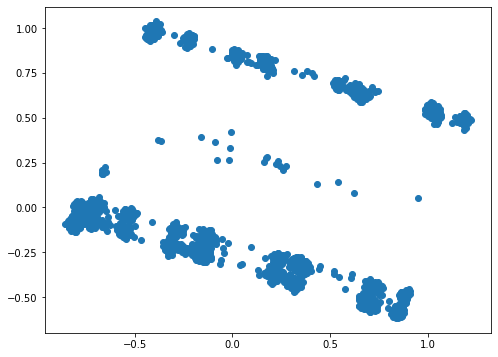

In [21]:
# user level
df_selected = df.filter(regex="[^time_stamp]").iloc[:,3:] # all data
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
df_selected = pd.DataFrame(df_selected)
df_selected.columns = df.filter(regex="[^time_stamp]").iloc[:,3:].columns
df_selected = pd.concat([df.iloc[:,:3],df_selected], axis=1)
df_user = df_selected.groupby('userID').median().iloc[:,2:]
pca = PCA()
vectors = pca.fit_transform(df_user) 
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

In [25]:
df_user

,date_day,date_month,date_year,date_hour,date_minute,date_second,dayofweek_num,weekofyear,quarter,days_in_month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year
userID,,,,,,,,,,,,,,,,,
75,0.933333,0.818182,0.25,1.000000,0.338983,0.254237,1.000000,0.823529,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.500000,0.272727,0.50,0.173913,0.728814,0.762712,0.000000,0.294118,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,0.900000,0.636364,0.50,0.130435,0.728814,0.474576,0.166667,0.666667,0.666667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,0.966667,0.818182,0.25,0.521739,0.881356,0.949153,0.000000,0.843137,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,0.816667,0.727273,0.50,0.521739,0.381356,0.449153,0.750000,0.735294,0.833333,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71497,0.900000,0.636364,0.50,0.956522,0.474576,0.593220,0.166667,0.666667,0.666667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71509,0.000000,0.545455,0.75,0.956522,0.601695,0.457627,0.166667,0.509804,0.666667,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
71525,0.333333,0.454545,0.25,0.608696,0.915254,0.322034,1.000000,0.431373,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Graph


In [ ]:
# test
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
 
G = nx.Graph()
Matrix = np.array(
    [
        [0, 1, 1, 1, 1, 1, 0, 0],  # a
        [0, 0, 1, 0, 1, 0, 0, 0],  # b
        [0, 0, 0, 1, 0, 0, 0, 0],  # c
        [0, 0, 0, 0, 1, 0, 0, 0],  # d
        [0, 0, 0, 0, 0, 1, 0, 0],  # e
        [0, 0, 1, 0, 0, 0, 1, 1],  # f
        [0, 0, 0, 0, 0, 1, 0, 1],  # g
        [0, 0, 0, 0, 0, 1, 1, 0]  # h
    ]
)
pos = nx.layout.spring_layout(G)
for i in range(len(Matrix)):
    for j in range(len(Matrix)):
        G.add_edge(i, j)
 
nx.draw(G)
plt.show()

## use centroids of Tagging + all time-series data pca

In [ ]:
dis_l1 = (pow(centroids[:,0],2)+pow(centroids[:,1],2))
dis_l1

array([0.63241715, 0.02248993, 0.62930406, 0.2478305 , 1.23416511,
       0.98672805, 0.4745856 , 0.05654733, 0.68729706, 0.65283004,
       0.04274901, 0.83148844, 0.24738381, 0.19822052, 1.44291516,
       0.10012788, 0.91722114, 0.33598854, 0.94125638, 0.66908064,
       0.05475995, 0.52203415, 0.02484719, 0.04968762, 0.14452386])

In [ ]:
df_dis = pd.DataFrame(np.zeros([25,25]))

for i in range(0,25):
  for j in range(0,25):
    # df_dis.iloc[i, j] = pow((dis_l1[i]-dis_l1[j]),2) #l1
    df_dis.iloc[i, j] = pow((centroids[:,0][i]-centroids[:,0][j]),2) + pow((centroids[:,1][i]-centroids[:,1][j]),2)

### Scaled

In [ ]:
scaler = MinMaxScaler()
df_dis = scaler.fit_transform(df_dis)
df_dis = pd.DataFrame(df_dis)
df_dis.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.369166,0.591543,0.576100,0.306035,0.850079,0.005916,0.233900,0.597780,0.007641,0.268587,0.836907,0.554847,0.581889,0.290077,0.157314,0.008569,0.028715,0.842244,0.604850,0.411339,0.002361,0.448504,0.368090,0.536075
1,0.253450,0.000000,0.131862,0.071302,0.436469,0.551820,0.204759,0.044845,0.140429,0.284976,0.015980,0.387861,0.066540,0.063579,0.450478,0.083591,0.306555,0.151908,0.382412,0.139962,0.006533,0.233243,0.075940,0.002965,0.043233
2,0.870731,0.282713,0.000000,0.034645,0.964297,0.957047,0.810242,0.663746,0.000324,0.956314,0.464993,0.543156,0.032141,0.053665,0.965830,0.768434,0.893564,0.728986,0.475495,0.000299,0.171546,0.876128,0.819554,0.212907,0.072073
3,0.602848,0.108678,0.024629,0.000000,0.672215,0.642304,0.544374,0.342180,0.029470,0.655150,0.225612,0.356468,0.000540,0.001507,0.686615,0.423269,0.646349,0.471900,0.323531,0.027426,0.053728,0.591306,0.383858,0.079961,0.005995
4,0.420732,0.874011,0.900632,0.883145,0.000000,0.224268,0.479541,0.859353,0.902064,0.330269,0.878686,0.402185,0.885226,0.878543,0.003019,0.713099,0.392137,0.567314,0.438134,0.900868,0.878615,0.430670,0.839171,0.880744,0.878246


In [ ]:
df_dis.describe().loc['75%',:].mean()

0.5742124276703159

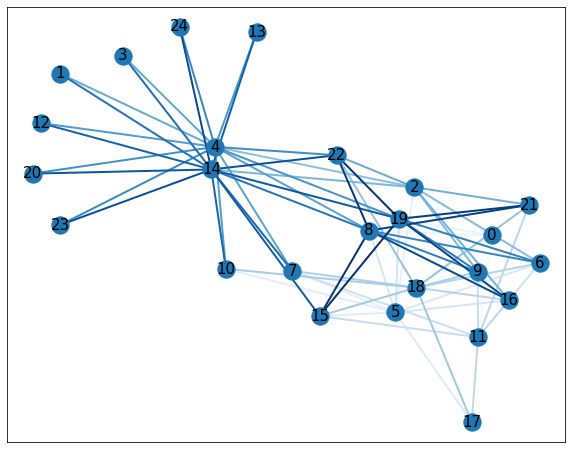

75


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random
random.seed(0)        
np.random.seed(0)
minDis = 0.8
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

### UnScaled 

In [ ]:
df_dis.describe().loc['75%',:].mean()

1.46120866498082

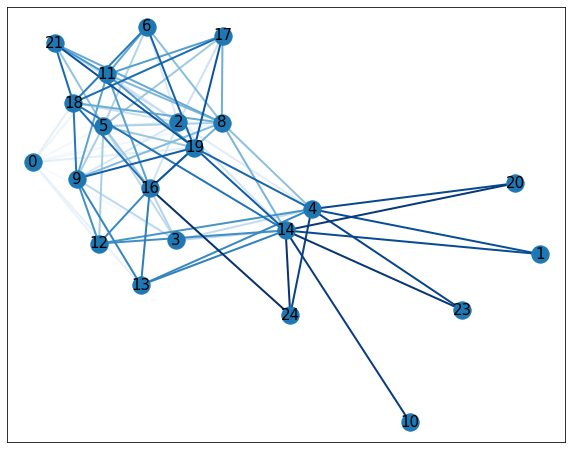

78


In [ ]:
random.seed(0)        
np.random.seed(0)
minDis = 1.4612
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)
pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

# Hashing
TSFresh featuers：压缩维度，保留语义，寻找candidate pairs

In [2]:
import swifter

import multiprocessing as mp
print('CPU numbers:',mp.cpu_count())
def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)
def apply_by_multiprocessing(df, func, **kwargs):
#     print(kwargs)
    workers = kwargs.pop('workers')
    pool = mp.Pool(processes=workers)
    result = pool.map(_apply_df, [(d, func, kwargs) for d in np.array_split(df, workers)])
    pool.close()
    return pd.concat(list(result))
#apply_by_multiprocessing(fullset['Text'], process_text, workers=cores)

CPU numbers: 32


In [24]:
import pickle
with open('./TSFresh/TSFresh_user.pickle', 'rb') as handle:
    extracted_features = pickle.load(handle)

with open('./TSFresh/TSFresh_movie.pickle', 'rb') as handle:
    extracted_features_movie = pickle.load(handle)
    
extracted_features.shape,extracted_features_movie.shape 

((2113, 3148), (5908, 3148))

In [4]:
extracted_features.shape,extracted_features_movie.shape
# extracted_features_tag.pickle / extracted_features_movie_tag.pickle ((984, 1574), (5798, 1574))

((984, 4722), (5798, 4722))

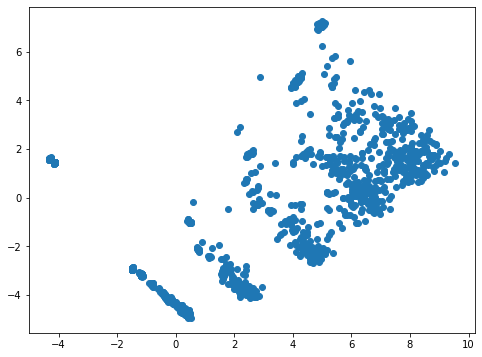

In [29]:
scaler = MinMaxScaler()
tsf_u = scaler.fit_transform(extracted_features)
vectors = PCA().fit_transform(tsf_u) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

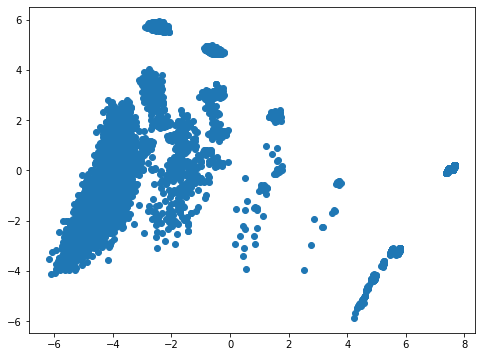

In [27]:
scaler = MinMaxScaler()
tsf_m = scaler.fit_transform(extracted_features_movie)
vectors = PCA().fit_transform(tsf_m) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

## Hyperplae LSH

In [30]:
tsf_u = pd.DataFrame(tsf_u)
# tsf_u.columns = extracted_features.columns
tsf_u

,0,1,2,3,4,5,6,7,8,9,...,3138,3139,3140,3141,3142,3143,3144,3145,3146,3147
0,0.0,0.0,0.0,0.0,0.000338,0.000549,0.000241,0.481481,0.561404,0.933333,...,0.000000,0.043128,0.067747,0.0,0.201632,0.153959,0.228765,0.234152,0.256564,0.229237
1,0.0,0.0,0.0,0.0,0.000181,0.000167,0.000241,0.481481,0.561404,0.500000,...,0.000000,0.043128,0.067747,0.0,0.201632,0.153959,0.228765,0.234152,0.256564,0.229237
2,0.0,1.0,1.0,1.0,0.007760,0.011784,0.000000,0.481481,0.561404,0.900000,...,0.000000,0.000000,0.000000,0.0,0.201632,0.153959,0.228765,0.234152,0.256564,0.229237
3,0.0,0.0,0.0,0.0,0.000350,0.000588,0.000241,0.481481,0.561404,0.966667,...,0.000000,0.043128,0.067747,0.0,0.201632,0.153959,0.228765,0.234152,0.256564,0.229237
4,1.0,0.0,0.0,0.0,0.000603,0.000876,0.321429,0.314815,0.561404,0.816667,...,0.000000,0.043128,0.067747,0.0,0.201632,0.153959,0.228765,0.234152,0.256564,0.229237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,0.0,0.0,1.0,1.0,0.013867,0.021083,0.001786,0.482407,0.562303,0.900000,...,0.040751,0.037229,0.033810,0.0,0.295015,0.233248,0.252720,0.241004,0.263537,0.216082
2109,1.0,0.0,1.0,1.0,0.002522,0.000679,0.010405,0.480461,0.559733,0.000000,...,0.091975,0.096533,0.098608,0.0,0.123645,0.153959,0.309181,0.338965,0.340736,0.276984
2110,0.0,0.0,0.0,0.0,0.000121,0.000078,0.000241,0.481481,0.561404,0.333333,...,0.000000,0.043128,0.067747,0.0,0.201632,0.153959,0.228765,0.234152,0.256564,0.229237
2111,0.0,1.0,1.0,1.0,0.000688,0.001099,0.000000,0.481481,0.561404,0.933333,...,0.000000,0.043128,0.067747,0.0,0.201632,0.153959,0.228765,0.234152,0.256564,0.229237


In [10]:
import numpy as np
import turicreate
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import pairwise_distances
import time
from copy import copy
import matplotlib.pyplot as plt
%matplotlib inline

'''compute norm of a sparse vector'''
def norm(x):
    sum_sq=x.dot(x.T)
    norm=np.sqrt(sum_sq)
    return(norm)

In [11]:
pd.Series(np.array(tsf_u).ravel()).value_counts()

0.000000    705665
1.000000    133851
0.500000     56222
1.000000      7200
0.250000      5628
             ...  
0.017897         1
0.997802         1
0.509913         1
0.101010         1
0.998445         1
Length: 728231, dtype: int64

In [12]:
def sframe_to_scipy(x, column_name):
    '''
    Convert a dictionary column of an SFrame into a sparse matrix format where
    each (row_id, column_id, value) triple corresponds to the value of
    x[row_id][column_id], where column_id is a key in the dictionary.
       
    Example
    >>> sparse_matrix, map_key_to_index = sframe_to_scipy(sframe, column_name)
    '''
    assert type(x[column_name][0]) == dict, \
        'The chosen column must be dict type, representing sparse data.'
    
    # Stack will transform x to have a row for each unique (row, key) pair.
    x = x.stack(column_name, ['feature', 'value'])
    
    # Map feature words to integers 
    unique_words = sorted(x['feature'].unique())
    mapping = {word:i for i, word in enumerate(unique_words)} # unique word的字典，word:ID
    x['feature_id'] = x['feature'].apply(lambda x: mapping[x]) # feature替换成 ID
    
    # Create numpy arrays that contain the data for the sparse matrix.
    row_id = np.array(x['id']) # stacked 表里的index, 0,0,0,....
    col_id = np.array(x['feature_id']) # unique word id
    data = np.array(x['value'])  # tfidf value
    
    width = x['id'].max() + 1
    height = x['feature_id'].max() + 1
    
    # Create a sparse matrix.
    mat = csr_matrix((data, (row_id, col_id)), shape=(width, height))
    return mat, mapping

In [13]:
tsf_u_stack = pd.DataFrame(tsf_u.stack()).reset_index()
tsf_u_stack.columns = ['uid','col_id','value']
tsf_u_stack

,uid,col_id,value
0,0,0,0.000000
1,0,1,1.000000
2,0,2,1.000000
3,0,3,1.000000
4,0,4,0.007412
...,...,...,...
4646443,983,4717,0.131575
4646444,983,4718,0.133685
4646445,983,4719,0.171094
4646446,983,4720,0.129695


In [14]:
row_id = np.array(tsf_u_stack['uid']) 
col_id = np.array(tsf_u_stack['col_id']) # unique word id
data = np.array(tsf_u_stack['value'])  # tfidf v

width, height = tsf_u_stack['uid'].max()+1, tsf_u_stack['col_id'].max()+1

In [15]:
mapping = {attr:i for i, attr in enumerate(extracted_features.columns)}

In [16]:
corpus = csr_matrix((data, (row_id, col_id)), shape=(width, height))

In [17]:
corpus

<984x4722 sparse matrix of type '<class 'numpy.float64'>'
	with 4646448 stored elements in Compressed Sparse Row format>

In [18]:
## Train the LSH
def generate_random_vectors(dim, n_vectors):
    return np.random.randn(dim, n_vectors)

In [106]:
np.random.seed(42)
n_vectors = 32
random_vectors = generate_random_vectors(corpus.shape[1], n_vectors)
random_vectors.shape

(4722, 32)

In [107]:
bin_indices_bits = corpus.dot(random_vectors) >= 0 
bin_indices_bits

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False],
       [ True, False, False, ..., False,  True,  True],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True]])

In [108]:
bin_indices_bits.shape

(984, 32)

In [109]:
np.array(bin_indices_bits,dtype=int)

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [110]:
1 << 16

65536

In [111]:
# convert binary hash code into int bucket
powers_of_two = 1 << np.arange(n_vectors - 1, -1, step=-1)
bin_indices = bin_indices_bits.dot(powers_of_two)

In [112]:
pd.Series(bin_indices).nunique()

246

<AxesSubplot:ylabel='Frequency'>

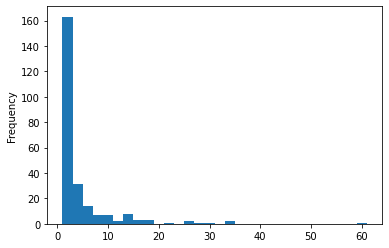

In [123]:
pd.Series(bin_indices).value_counts().plot.hist(bins=30)

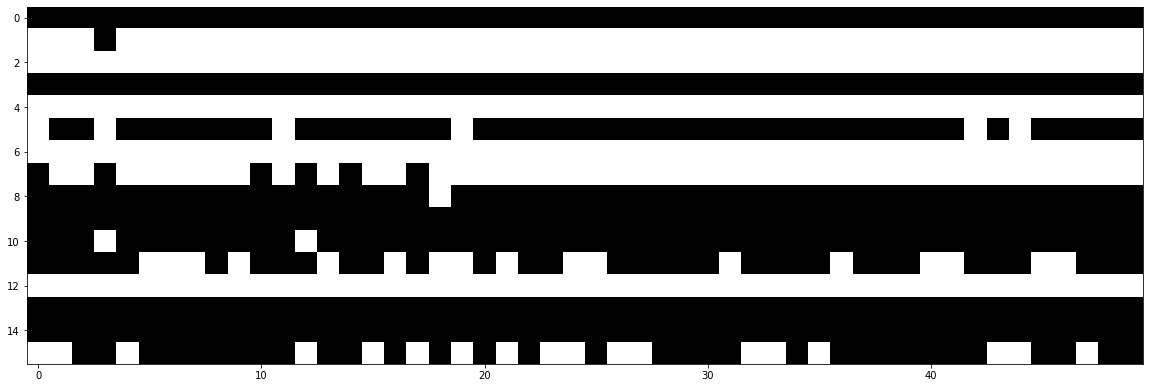

In [134]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.imshow(bin_indices_bits[100:150,:].T, cmap='binary')

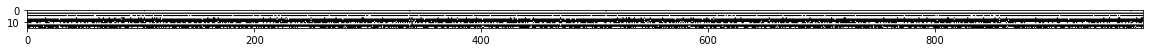

In [135]:
plt.imshow(bin_indices_bits.T, cmap='binary')

In [125]:
bin_indices_bits.shape

(984, 16)

In [117]:
from collections import defaultdict 

table = defaultdict(list)
for idx, bin_index in enumerate(bin_indices):
    #if bin_index not in table:
        #table[bin_index] = []    
    # Fetch the list of document ids associated with the bin and add the document id to the end.
    table[bin_index].append(idx)

In [119]:
model = {'data': data, # 原来的sparse matrix
             'table': table, # bin:[id] dict hash table
             'random_vectors': random_vectors,  
             'bin_indices': bin_indices, # 10进制的binary hash code
             'bin_indices_bits': bin_indices_bits} #binary hash code

In [120]:
def compare_bits(model, id_1, id_2):
    bits1 = model['bin_indices_bits'][id_1]
    bits2 = model['bin_indices_bits'][id_2]
    print('Number of agreed bits: ', np.sum(bits1 == bits2))
    return np.sum(bits1 == bits2)

In [139]:
similariy = compare_bits(model, 1, 100)

Number of agreed bits:  13


In [239]:
res_df = pd.DataFrame('c-'+pd.Series(bin_indices,extracted_features.index).astype(str).add_prefix('U-')).reset_index()
res_df.columns = ['UID','BucketID']
res_df

,UID,BucketID
0,U-127,c-38118
1,U-190,c-38135
2,U-325,c-38135
3,U-383,c-38134
4,U-477,c-38118
...,...,...
979,U-71420,c-38118
980,U-71478,c-38134
981,U-71497,c-38134
982,U-71509,c-38391


In [397]:
df.iloc[:,1] = 'I-'+df.iloc[:,1].astype('str')
res_movie = pd.DataFrame(df.iloc[:,:2].groupby('userID').apply(lambda x: list(x['movieID']))[extracted_features.index])
res_movie['bucket'] = 'c-'+pd.Series(bin_indices,extracted_features.index).astype(str)
res_movie

,0,bucket
127,"[I-1343, I-1343, I-2080, I-2080, I-2953, I-295...",c-38118
190,"[I-741, I-1274, I-2116, I-2810, I-3000, I-3997...",c-38135
325,"[I-628, I-30818, I-34162, I-45720, I-51084]",c-38135
383,"[I-6270, I-6270, I-27741, I-45175]",c-38134
477,"[I-1188, I-1188, I-1267, I-1267, I-1274, I-159...",c-38118
...,...,...
71420,"[I-1, I-208, I-208, I-260, I-260, I-260, I-316...",c-38118
71478,"[I-4993, I-5669, I-5878]",c-38134
71497,"[I-1, I-1, I-261, I-356, I-356, I-356, I-480, ...",c-38134
71509,"[I-17, I-47, I-390, I-680, I-922, I-968, I-114...",c-38391


In [398]:
dict_cP = res_movie.groupby('bucket').agg(sum)[0].map(set).map(list)
dict_cP

bucket
c-37078    [I-4878, I-593, I-64993, I-4027, I-47, I-64614...
c-37079    [I-27706, I-50798, I-2516, I-50068, I-5082, I-...
c-37094    [I-5784, I-41571, I-920, I-6451, I-4363, I-741...
c-37095    [I-47997, I-6502, I-56174, I-37386, I-5219, I-...
c-37110    [I-4890, I-4011, I-1394, I-231, I-3751, I-7649...
c-37111    [I-45081, I-1950, I-50923, I-4011, I-40337, I-...
c-37206    [I-7569, I-59615, I-6157, I-4896, I-6874, I-63...
c-37238    [I-5690, I-920, I-903, I-50923, I-3462, I-441,...
c-37298    [I-7569, I-4349, I-5650, I-3751, I-2916, I-364...
c-37334    [I-382, I-4198, I-4327, I-1339, I-5357, I-6366...
c-37366    [I-59615, I-36, I-49265, I-3704, I-6874, I-269...
c-37367    [I-4890, I-45081, I-4158, I-3489, I-6946, I-75...
c-37988                [I-55908, I-58, I-1234, I-59594, I-1]
c-37989      [I-1223, I-38038, I-1266, I-912, I-1148, I-745]
c-37990                               [I-750, I-2997, I-508]
c-37991    [I-3578, I-4878, I-296, I-1208, I-1884, I-1210...
c-38007    [I-581

In [400]:
dict_Uc = dict(zip(res_df['UID'],res_df['BucketID']))

In [401]:
dict_Pc = df[df.userID.isin(extracted_features.index)].groupby('movieID')\
.apply(lambda x: set([dict_Uc['U-'+str(i)] for i in set(x['userID'])])).map(list)
dict_Pc

movieID
I-1       [c-38119, c-53495, c-37111, c-37298, c-38358, ...
I-10      [c-38119, c-37298, c-38118, c-37079, c-38135, ...
I-1003                                            [c-54487]
I-1005                          [c-37298, c-38134, c-38390]
I-1006                                            [c-37298]
                                ...                        
I-986                                             [c-37367]
I-992                                             [c-53719]
I-994                  [c-38262, c-38134, c-38263, c-38390]
I-996                                    [c-38119, c-38391]
I-999                                             [c-53719]
Length: 5852, dtype: object

In [404]:
res_output = {'Uc':{},'Ic':{}}
res_output['Uc'] = dict_Uc
res_output['Ic'] = dict(dict_Pc)
res_output

{'Uc': {'U-127': 'c-38118',
  'U-190': 'c-38135',
  'U-325': 'c-38135',
  'U-383': 'c-38134',
  'U-477': 'c-38118',
  'U-498': 'c-38119',
  'U-533': 'c-38118',
  'U-580': 'c-38119',
  'U-622': 'c-38134',
  'U-636': 'c-38134',
  'U-728': 'c-38119',
  'U-788': 'c-38135',
  'U-922': 'c-38119',
  'U-1017': 'c-38119',
  'U-1035': 'c-38117',
  'U-1117': 'c-38119',
  'U-1118': 'c-38391',
  'U-1122': 'c-38134',
  'U-1164': 'c-38135',
  'U-1224': 'c-38103',
  'U-1225': 'c-38119',
  'U-1282': 'c-38119',
  'U-1355': 'c-38119',
  'U-1392': 'c-38135',
  'U-1436': 'c-38118',
  'U-1496': 'c-38119',
  'U-1504': 'c-38119',
  'U-1510': 'c-38119',
  'U-1600': 'c-37988',
  'U-1632': 'c-38134',
  'U-1663': 'c-38118',
  'U-1713': 'c-38119',
  'U-1724': 'c-38134',
  'U-1751': 'c-38134',
  'U-1915': 'c-38119',
  'U-2102': 'c-37110',
  'U-2204': 'c-38135',
  'U-2218': 'c-38119',
  'U-2276': 'c-38119',
  'U-2429': 'c-38135',
  'U-2471': 'c-38119',
  'U-2477': 'c-38119',
  'U-2589': 'c-38119',
  'U-2643': 'c-373

In [406]:
res_output = {'cU':{},'cI':{}}
res_output['cU'] = dict(res_df.groupby('BucketID').apply(lambda x: list(x['UID'])))
res_output['cI'] = dict(dict_cP)

In [407]:
import json
jsonString = json.dumps(res_output)
jsonFile = open(f"output/TSF_LSH_cU_cI.json", "w")
# jsonFile = open(f"output/TSF_LSH_Uc_Ic.json", "w")

jsonFile.write(jsonString)
jsonFile.close()

## sample试验

In [8]:
data = pd.DataFrame([[-1, 2, 30], [-0.5, 6, 0.4], [0, 10, 0.5], [1, 18, 0.003],[0.2,0.003,-0.4]])
data

,0,1,2
0,-1.0,2.000,30.000
1,-0.5,6.000,0.400
2,0.0,10.000,0.500
3,1.0,18.000,0.003
4,0.2,0.003,-0.400


In [9]:
data.mean()

0   -0.0600
1    7.2006
2    6.1006
dtype: float64

In [10]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data))
data

,0,1,2
0,0.00,0.110963,1.000000
1,0.25,0.333222,0.026316
2,0.50,0.555481,0.029605
3,1.00,1.000000,0.013257
4,0.60,0.000000,0.000000


In [230]:
# 简单hash, 大于均值为1，反之为0
# def testf(x_mean):
#     return lambda x: [[i,x_mean] if i>x_mean else i for i in x]

def meanHash(x, x_mean):
#     return [[i,x_mean] if i>x_mean else i for i in x]
    return [1 if i>x_mean else 0 for i in x]

def medianHash(x, x_median):
#     return [[i,x_median] if i>x_median else i for i in x]
    return [1 if i>x_median else 0 for i in x]

In [231]:
tsf_u_means = pd.DataFrame(tsf_u).mean()
tsf_u_medians = pd.DataFrame(tsf_u).median()

In [140]:
from tqdm._tqdm_notebook import tqdm_notebook
from tqdm import tqdm
tqdm_notebook.pandas()

/tmp/ipykernel_896228/1383614074.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


In [216]:
res = []
df_tsf_u = pd.DataFrame(tsf_u)
# for r in tqdm(tsf_u.T[:10]):
for i, c in tqdm(df_tsf_u.iteritems()):
    res.append(pd.DataFrame(c).apply(lambda x: meanHash(x,tsf_u_means[i])))  # 1228 it/s 100*300
#     res.append(pd.DataFrame(c).swifter.progress_bar(False).apply(lambda x: meanHash(x,tsf_u_means[i]))) # 268 it/s
#     res.append(apply_by_multiprocessing(pd.DataFrame(c), meanHash, workers=4, x_mean=tsf_u_means[i])) # 8 it/s
tsf_u_hash = pd.concat(res,axis=1)
tsf_u_hash

4722it [00:05, 881.31it/s]


,0,1,2,3,4,5,6,7,8,9,...,4712,4713,4714,4715,4716,4717,4718,4719,4720,4721
0,0,1,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,1,0,0,0,1,...,1,1,1,0,0,0,0,0,1,0
2,1,0,1,1,0,0,1,0,1,0,...,1,1,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,1,...,1,1,1,0,0,0,0,0,0,0
4,0,1,1,1,0,1,0,0,0,1,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1,1,0,1,1,1,0,0,0,1,...,1,1,1,0,1,1,1,1,1,1
980,1,0,0,0,0,0,1,1,0,0,...,1,1,1,0,0,0,0,0,0,0
981,0,1,1,1,1,1,0,0,0,1,...,1,1,1,0,0,0,0,0,0,0
982,1,0,1,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [233]:
res = []
df_tsf_u.progress_apply(lambda c: res.append(pd.DataFrame(c).apply(lambda x: meanHash(x,tsf_u_means[c.name])))) #1023 it/s
tsf_u_hash = pd.concat(res,axis=1)

In [228]:
pd.Series(tsf_u_hash.values.reshape(-1)).value_counts()

0    2951779
1    1694669
dtype: int64

In [232]:
res = []
df_tsf_u.progress_apply(lambda c: res.append(pd.DataFrame(c).apply(lambda x: medianHash(x,tsf_u_medians[c.name])))) #1023 it/s
tsf_u_hash1 = pd.concat(res,axis=1)
tsf_u_hash1

,0,1,2,3,4,5,6,7,8,9,...,4712,4713,4714,4715,4716,4717,4718,4719,4720,4721
0,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,1,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1,0,0,0,1,1,1,0,0,1,...,1,1,1,0,1,1,1,1,1,1
980,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
981,0,0,0,0,1,1,0,0,0,1,...,1,1,1,0,0,0,0,0,0,0
982,1,0,0,0,1,0,1,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [234]:
pd.Series(tsf_u_hash1.values.reshape(-1)).value_counts()

0    3945595
1     700853
dtype: int64

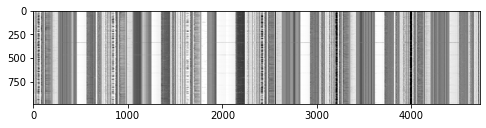

In [37]:
plt.imshow(tsf_u, cmap='binary')

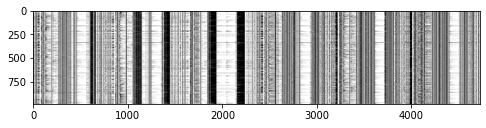

In [470]:
plt.imshow(tsf_u_hash.values, cmap='binary')

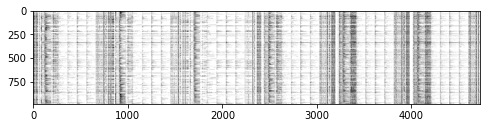

In [236]:
plt.imshow(tsf_u_hash1.values, cmap='binary')

## LSH on TSFresh 

In [345]:
import os
import time
import itertools
import collections
import numpy as np
import matplotlib.pyplot as plt

def cossim(u,v):
    norm = np.linalg.norm(u)*np.linalg.norm(v) # 向量范数之积 所有元素的平方和
    cosine = u@v/norm  #矩阵乘法
    ang = np.arccos(cosine)
    return 1-ang/np.pi

In [280]:
np.linalg.norm([[1,2],[3,4]])

5.477225575051661

In [275]:
np.linalg.norm([1,2])

2.23606797749979

In [279]:
np.linalg.norm([2.23606797749979,5])

5.477225575051661

In [320]:
np.array([[1,2],[1,2]]) @ np.array([[3,4],[3,4]])

array([[ 9, 12],
       [ 9, 12]])

In [346]:
cossim(np.array([[1,2],[1,2]]),np.array([[3,4],[3,4]]))

array([[0.63185596, 0.68031282],
       [0.63185596, 0.68031282]])

In [353]:
cossim(np.array([1,2]),np.array([3,4]))

0.9427508529512998

In [352]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(X=np.array([[1,2],[1,2]]),Y=np.array([[3,4],[3,4]]))

array([[0.98386991, 0.98386991],
       [0.98386991, 0.98386991]])

In [355]:
from scipy import spatial
1-spatial.distance.cosine([1,2], [3,4])

0.9838699100999074

In [307]:
np.array([[1,2],[1,2]])@ np.array([3,4])

array([11, 11])

In [391]:
A = pd.DataFrame(extracted_features).iloc[:100,:200]
A=A.reset_index(drop=True).values
D,n = 200,100
A

array([[ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         5.30357508e-17,  3.14709710e-16, -2.12769669e-16],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         5.30357508e-17,  3.14709710e-16, -2.12769669e-16],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         5.30357508e-17,  3.14709710e-16, -2.12769669e-16],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         5.30357508e-17,  3.14709710e-16, -2.12769669e-16],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         5.30357508e-17,  3.14709710e-16, -2.12769669e-16],
       [ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         5.30357508e-17,  3.14709710e-16, -2.12769669e-16]])

In [375]:
S = pd.DataFrame(tsf_u_hash).iloc[:100,:200].values
S

array([[0, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0]])

In [379]:
from sklearn.metrics import jaccard_score
jaccard_score(S[99,:],S[0,:]),jaccard_score(S[99,:],S[98,:]),jaccard_score(S[99,:],S[50,:])

(0.4791666666666667, 0.16666666666666666, 0.42105263157894735)

In [411]:
cossim(A[0,:],A[99,:]),cossim(A[98,:],A[99,:]),cossim(A[99,:],A[50,:])

(0.9797347836235454, 0.7767906803161431, 0.9708394828087121)

In [392]:
for (i,u),(j,v) in itertools.combinations([(i,x) for i,x in enumerate(A.iloc[:4,:4])],2):
    print(u, v)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [395]:
# Brute force calculation baseline
true_pairs_dict = {}

thresh = 0.8
cos_vals = []
start = time.time()
# # (i,u),(j,v) in itertools.combinations([(i,x) for i,x in enumerate(
for u in range(99):
    for v in range(99):
        if u!=v:
            val = cossim(A[v,:],A[u,:])
            cos_vals.append(val)
            if val > thresh:
                if (v,u) not in true_pairs_dict:
                    true_pairs_dict[(u,v)] = val
        
        
t_brute = time.time()-start

# save just the keys without the values. Easier to compare later to LSH
true_pairs = set(true_pairs_dict.keys())

print(f"Brute force calculation time: {t_brute:.3f}")
print(f"Discovered pairs:")
for k, v in true_pairs_dict.items():
    print(f"Pair: {k},\tSimilarity: {v:.2f}.")

/tmp/ipykernel_896228/1471083435.py:11: RuntimeWarning: invalid value encountered in arccos
  ang = np.arccos(cosine)


Brute force calculation time: 0.194
Discovered pairs:
Pair: (0, 1),	Similarity: 0.97.
Pair: (0, 4),	Similarity: 0.98.
Pair: (0, 5),	Similarity: 0.99.
Pair: (0, 6),	Similarity: 0.93.
Pair: (0, 9),	Similarity: 0.94.
Pair: (0, 10),	Similarity: 0.97.
Pair: (0, 11),	Similarity: 0.91.
Pair: (0, 18),	Similarity: 0.96.
Pair: (0, 19),	Similarity: 0.84.
Pair: (0, 31),	Similarity: 0.80.
Pair: (0, 37),	Similarity: 0.82.
Pair: (0, 39),	Similarity: 0.89.
Pair: (0, 40),	Similarity: 0.99.
Pair: (0, 41),	Similarity: 0.86.
Pair: (0, 44),	Similarity: 0.86.
Pair: (0, 45),	Similarity: 0.93.
Pair: (0, 46),	Similarity: 0.90.
Pair: (0, 50),	Similarity: 0.95.
Pair: (0, 51),	Similarity: 0.91.
Pair: (0, 53),	Similarity: 0.88.
Pair: (0, 55),	Similarity: 0.95.
Pair: (0, 56),	Similarity: 0.87.
Pair: (0, 59),	Similarity: 0.92.
Pair: (0, 60),	Similarity: 0.91.
Pair: (0, 64),	Similarity: 0.94.
Pair: (0, 66),	Similarity: 0.92.
Pair: (0, 68),	Similarity: 0.98.
Pair: (0, 69),	Similarity: 0.83.
Pair: (0, 70),	Similarity: 

In [396]:
len(true_pairs)

1239

In [413]:
# Brute force calculation baseline
hash_pairs_dict = {}

thresh = 0.5
jc_vals = []
start = time.time()
# # (i,u),(j,v) in itertools.combinations([(i,x) for i,x in enumerate(
for u in range(99):
    for v in range(99):
        if u!=v:
            val = jaccard_score(S[v,:],S[u,:])
            jc_vals.append(val)
            if val > thresh:
                if (v,u) not in hash_pairs_dict:
                    hash_pairs_dict[(u,v)] = val
        

t_brute = time.time()-start

# save just the keys without the values. Easier to compare later to LSH
hash_pairs = set(hash_pairs_dict.keys())

print(f"Brute force calculation time: {t_brute:.3f}")
print(f"Discovered pairs:")
print(len(hash_pairs))

Brute force calculation time: 4.529
Discovered pairs:
980


In [414]:
# LSH
b, r = 20, 5

n = b*r
print(f"Transition probability: {(1/b)**(1/r):.2f}")

Transition probability: 0.55


In [ ]:
# memory usage查看
# 先假设有个简单的hash, hash bucket里有很多user node, bucket里面才有user/item的semantic关系
# 俩层走，大外层是temporal bucket, 内层是semantic, buckets之间的关系（cluster）

# 学会 Thanet的code
# 画出一个推荐的流程图，从头到尾
# feature hash to buckets
# aggregate 一个bucket里的, 求TF-IDF，作为bucket的表示，

# 用semantic做bucket,再倒过来实施aggreagate temporal featue（用不着tf-idf, 直接计算mean、median等）




In [43]:
D,n

(200, 100)

In [40]:
A.shape

(100, 200)

In [48]:
S = pd.DataFrame(tsf_u_hash).iloc[:100,:200].values
S.shape

(100, 200)

In [46]:
# # Compute signature matrix
R = A@np.random.randn(D,n) # @ is matrix multiplication
S = np.where(R>0,1,0)

# # Break into bands
# S = np.split(S, b, axis=1)
S.shape

(100, 100)

In [419]:
len(S)

20

In [415]:
# Compute LSH pairs
start = time.time()

# # Compute signature matrix
# R = A@np.random.randn(D,n) # @ is matrix multiplication
# S = np.where(R>0,1,0)

# # Break into bands
# S = np.split(S, b, axis=1)

# column vector to convert binary vector to integer e.g. (1,0,1)->5
binary_column = 2**np.arange(r).reshape(-1,1)

# convert each band into a single integer, 
# i.e. convert band matrices to band columns
S = np.hstack([M@binary_column for M in S])

# Every value in the matrix represents a hash bucket assignment
# For every bucket in row i, add index i to that bucket
d = collections.defaultdict(set)
with np.nditer(S,flags=['multi_index']) as it:
    for x in it:
        d[int(x)].add(it.multi_index[0])
        
# For every bucket, find all pairs. These are the LSH pairs.
candidate_pairs = set()
for k,v in d.items():
    if len(v) > 1:
        for pair in itertools.combinations(v,2):
            candidate_pairs.add(tuple(sorted(pair)))

# Finally, perform the actually similarity computation
# to weed out false positive
lsh_pairs = set()
for (i,j) in candidate_pairs:
    if cossim(A[i],A[j]) > thresh:
        lsh_pairs.add((i,j))
        
t_lsh = time.time()-start

print(f"LSH calculation time: {t_lsh:.3f}")

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 10)

In [522]:
len(candidate_pairs)

463

In [521]:
len(true_pairs)

316

# LSH
https://www.learndatasci.com/tutorials/building-recommendation-engine-locality-sensitive-hashing-lsh-python/

https://onestopdataanalysis.com/lsh/


In [3]:
pip install datasketch

     |████████████████████████████████| 67 kB 3.5 MB/s eta 0:00:011


## PCA-USER + LSH

### Method 1 把tagging-PCA 结果group

In [ ]:
vectors_1d = PCA(n_components=1).fit_transform(df_selected)
df_user_1d = pd.concat([df.filter(regex="[^time_stamp]").loc[:,'userID'],pd.DataFrame(vectors_1d)],axis=1)

In [ ]:
df_user_lst = pd.DataFrame(df_user_1d.groupby('userID').apply(lambda x: list(x[0])))
df_user_lst['tag_num'] = df_user_lst[0].apply(len)
df_user_lst[df_user_lst.tag_num>2]

,0,tag_num
userID,,
127,"[0.43703809454894255, 0.4335724797796725, 0.43...",23
190,"[-0.045189717425882174, -0.044055620195745576,...",26
325,"[-0.4319548865480935, 0.3567702853601463, -0.0...",5
383,"[0.989486860731099, 0.9898309391580569, 0.8174...",4
477,"[0.4464709689351199, 0.446470647628355, 0.4463...",26
...,...,...
71420,"[-0.11863773063393639, -0.11918003643387194, -...",56
71478,"[-0.7498674851406913, -0.7660245891539287, 0.0...",3
71497,"[0.5514569995000097, 0.5511110666836331, 0.530...",41


In [ ]:
    start_time = time.time()
    minhash = []
    
    for pcas in df_user_lst[0]:
        pcas = str(pcas)
        m = MinHash(num_perm=32)
        for s in pcas:
            m.update(s.encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=32)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))

### Method 2 把User-PCA 2D结果代入minHash

In [ ]:

m = MinHash()
data1 = [ 0.64816147, -0.54253993]
for d in data1:
  m.update(str(d).encode('utf8'))

In [ ]:
vectors

array([[ 0.77890402, -0.39060472],
       [-0.23016071, -0.14797051],
       [ 0.43704139, -0.29322769],
       ...,
       [ 1.05479409, -0.42498046],
       [ 1.07457846, -0.33916029],
       [ 1.08325624, -0.3532431 ]])

In [ ]:
    start_time = time.time()
    minhash = []
    
    for pcas in vectors:
        m = MinHash(num_perm=32)
        for s in pcas:
            m.update(str(s).encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=32)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))

It took 28.41197967529297 seconds to build forest.


In [ ]:
m.hashvalues

array([ 170058183,  231972810,   13184479,   31312792,  132721297,
        162003033,  223352304,  159809555,   56920750,  650229806,
         86101458,  267848141,  589979148,   60243568,  185660087,
        716560562,  303782223,  518718070,   75816273,  345530959,
        777096236,  171205302,  377605013,  225330139,  478898225,
        209569695,    3651271, 1313042232,   23909840,  146302257,
        614910999,   73081062], dtype=uint64)

In [ ]:
    start_time = time.time()
    
    query = vectors[2]
    m = MinHash(num_perm=32)
    for s in query:
        m.update(str(s).encode('utf8'))
        
    idx_array = np.array(forest.query(m, 10))
    if len(idx_array) == 0: 
      print("if your query is empty, return none")
    
    print(idx_array)

    # result = database.iloc[idx_array]['title']
    
    print('It took %s seconds to query forest.' %(time.time()-start_time))
    

[2]
It took 0.002424478530883789 seconds to query forest.


## MinHash Example
http://ekzhu.com/datasketch/minhash.html

In [ ]:
from datasketch import MinHash

data1 = ['minhash', 'is', 'a', 'probabilistic', 'data', 'structure', 'for',
        'estimating', 'the', 'similarity', 'between', 'datasets']
data2 = ['minhash', 'is', 'a', 'probability', 'data', 'structure', 'for',
        'estimating', 'the', 'similarity', 'between', 'documents']

m1, m2 = MinHash(), MinHash()
for d in data1:
    m1.update(d.encode('utf8'))
for d in data2:
    m2.update(d.encode('utf8'))
print("Estimated Jaccard for data1 and data2 is", m1.jaccard(m2))

s1 = set(data1)
s2 = set(data2)
actual_jaccard = float(len(s1.intersection(s2)))/float(len(s1.union(s2)))
print("Actual Jaccard for data1 and data2 is", actual_jaccard)

Estimated Jaccard for data1 and data2 is 0.7109375
Actual Jaccard for data1 and data2 is 0.7142857142857143


In [ ]:
m1.hashfunc

<function datasketch.hashfunc.sha1_hash32>

In [ ]:
m1.hashvalues

array([ 297616339,  279951299,  113505080,  311917730,    1735256,
        278730948,  249258812,  306660385,  386953741,  423518424,
        120511132,  607298570,  490287863,  115094987,  290874010,
         58384851,   82568189,  483072302,  312640790,   86174351,
        198731659,  788039411,   54507159,  828911042,   93863906,
         16071831,  260431759,  316407020,  261463262, 1524825895,
        648376383,  206326676,  176707072,   18714679,  478567185,
        180270267,   89979232,  111646838,  240537181,  342142234,
        620096571, 1407834531,  330961037,  663383944, 1105899070,
        181581527,  132285593,  375422674, 1436377075,  484486034,
        252946215,   87331021,  374968398,  968098446,   72863372,
        484842735,  179471924,  672911886,   14648640,  656664915,
        417888415,  271335895,   10055390,   48164330,  430379235,
        622471011,  822143071,  365346353,  210165943,  633147285,
        415249929,  133327723,  258658760,  272079305,  134604

## MinHash example2 
https://towardsdatascience.com/locality-sensitive-hashing-how-to-find-similar-items-in-a-large-set-with-precision-d907c52b05fc
 

In [3]:
import os
import time
import itertools
import collections
import numpy as np
import matplotlib.pyplot as plt

def cossim(u,v):
    norm = np.linalg.norm(u)*np.linalg.norm(v)
    cosine = u@v/norm
    ang = np.arccos(cosine)
    return 1-ang/np.pi

In [4]:
# get some random data points
N = 1000
D= 50
A = np.random.randn(N,D)
# artificially make some similar to others
A[5] = A[99] +np.random.randn(D)*0.05
A[20] = A[85] +np.random.randn(D)*0.15
A[13] = A[19] +np.random.randn(D)*0.25
A[56] = A[71] +np.random.randn(D)*0.5
A[45] = A[49] +np.random.randn(D)*0.66

In [36]:
df.shape

(47957, 21)

In [47]:
A = df.sample(1000, random_state=0).filter(regex="[^time_stamp]").iloc[:,:13].values
A

array([[63725,   490,   780, ...,    40,     4,    31],
       [19885,   356,  2347, ...,     8,     1,    28],
       [41740,  3994,   371, ...,    23,     2,    30],
       ...,
       [41838,  1237,  6800, ...,     3,     1,    31],
       [44285,  5791, 14588, ...,     2,     1,    31],
       [33384, 53129,  9689, ...,    39,     3,    30]])

In [48]:
# Brute force calculation baseline
true_pairs_dict = {}

thresh = 0.8

start = time.time()
for (i,u),(j,v) in itertools.combinations([(i,x) for i,x in enumerate(A)],2):
    val = cossim(u,v)
    if val > thresh:
        true_pairs_dict[(i,j)] = val
t_brute = time.time()-start

# save just the keys without the values. Easier to compare later to LSH
true_pairs = set(true_pairs_dict.keys())

print(f"Brute force calculation time: {t_brute:.3f}")
print(f"Discovered pairs:")
for k, v in true_pairs_dict.items():
    print(f"Pair: {k},\tSimilarity: {v:.2f}.")

Streaming output truncated to the last 5000 lines.
Pair: (421, 497),	Similarity: 0.81.
Pair: (421, 498),	Similarity: 0.90.
Pair: (421, 499),	Similarity: 0.91.
Pair: (421, 501),	Similarity: 0.85.
Pair: (421, 502),	Similarity: 0.95.
Pair: (421, 503),	Similarity: 0.95.
Pair: (421, 504),	Similarity: 0.98.
Pair: (421, 505),	Similarity: 0.92.
Pair: (421, 506),	Similarity: 0.82.
Pair: (421, 508),	Similarity: 0.94.
Pair: (421, 509),	Similarity: 0.95.
Pair: (421, 510),	Similarity: 0.91.
Pair: (421, 511),	Similarity: 0.98.
Pair: (421, 512),	Similarity: 0.91.
Pair: (421, 516),	Similarity: 0.82.
Pair: (421, 517),	Similarity: 0.87.
Pair: (421, 518),	Similarity: 0.84.
Pair: (421, 519),	Similarity: 0.91.
Pair: (421, 520),	Similarity: 0.94.
Pair: (421, 521),	Similarity: 0.95.
Pair: (421, 523),	Similarity: 0.97.
Pair: (421, 524),	Similarity: 0.96.
Pair: (421, 525),	Similarity: 0.85.
Pair: (421, 526),	Similarity: 0.98.
Pair: (421, 527),	Similarity: 0.98.
Pair: (421, 528),	Similarity: 0.95.
Pair: (421, 5

KeyboardInterrupt: ignored

In [5]:
# Brute force calculation baseline
true_pairs_dict = {}

thresh = 0.8

start = time.time()
for (i,u),(j,v) in itertools.combinations([(i,x) for i,x in enumerate(A)],2):
    val = cossim(u,v)
    if val > thresh:
        true_pairs_dict[(i,j)] = val
t_brute = time.time()-start

# save just the keys without the values. Easier to compare later to LSH
true_pairs = set(true_pairs_dict.keys())

print(f"Brute force calculation time: {t_brute:.3f}")
print(f"Discovered pairs:")
for k, v in true_pairs_dict.items():
    print(f"Pair: {k},\tSimilarity: {v:.2f}.")

Brute force calculation time: 10.004
Discovered pairs:
Pair: (5, 99),	Similarity: 0.98.
Pair: (13, 19),	Similarity: 0.92.
Pair: (20, 85),	Similarity: 0.95.
Pair: (45, 49),	Similarity: 0.87.
Pair: (56, 71),	Similarity: 0.81.


In [6]:
# LSH
b, r = 50, 18

n = b*r
print(f"Transition probability: {(1/b)**(1/r):.2f}")

Transition probability: 0.80


In [31]:
S

array([[ 59962, 130424,   6942, ..., 132247, 221223, 109767],
       [252191, 166394, 178512, ..., 259674,  66405,  26603],
       [255474, 244728,  14700, ..., 218581, 140055, 123403],
       ...,
       [ 15567, 219786,  50557, ..., 179302,  54129, 184969],
       [ 21923,  47743, 191981, ..., 260437, 165731,  41347],
       [227487, 214427, 170919, ...,   9460,  23088,  15325]])

In [54]:
D,n = 13,1000

In [57]:
S

[array([[0, 1, 1, ..., 0, 1, 1],
        [0, 1, 1, ..., 0, 1, 1],
        [1, 1, 1, ..., 0, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 1, 1],
        [1, 0, 1, ..., 0, 1, 1],
        [1, 1, 0, ..., 0, 1, 1]]), array([[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 1, 0]]), array([[1, 1, 1, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 0, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 0, 1],
        [1, 0, 1, ..., 1, 0, 1]]), array([[1, 1, 0, ..., 1, 0, 0],
        [1, 1, 0, ..., 1, 0, 0],
        [1, 1, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 1, 0, 0],
        [0, 1, 0, ..., 1, 0, 0],
        [0, 1, 0, ..., 1, 0, 0]]), array([[1, 1, 1, ..., 0, 1, 0],
        [1, 1, 1, ..., 0, 1, 0],
        [1, 1, 1, ..., 0, 1, 0],
        ...,
        [1, 1, 1, ..., 0, 1, 0],
       

In [28]:
# Compute LSH pairs
start = time.time()

# Compute signature matrix
R = A@np.random.randn(D,n) # @ is matrix multiplication
S = np.where(R>0,1,0)

# Break into bands
S = np.split(S, b, axis=1)

# column vector to convert binary vector to integer e.g. (1,0,1)->5
binary_column = 2**np.arange(r).reshape(-1,1)

# convert each band into a single integer, 
# i.e. convert band matrices to band columns
S = np.hstack([M@binary_column for M in S])

# Every value in the matrix represents a hash bucket assignment
# For every bucket in row i, add index i to that bucket
d = collections.defaultdict(set)
with np.nditer(S,flags=['multi_index']) as it:
    for x in it:
        d[int(x)].add(it.multi_index[0])
        
# For every bucket, find all pairs. These are the LSH pairs.
candidate_pairs = set()
for k,v in d.items():
    if len(v) > 1:
        for pair in itertools.combinations(v,2):
            candidate_pairs.add(tuple(sorted(pair)))

# Finally, perform the actually similarity computation
# to weed out false positive
lsh_pairs = set()
for (i,j) in candidate_pairs:
    if cossim(A[i],A[j]) > thresh:
        lsh_pairs.add((i,j))
        
t_lsh = time.time()-start

print(f"LSH calculation time: {t_lsh:.3f}")

LSH calculation time: 0.313


In [32]:
candidate_pairs

{(48, 849),
 (211, 840),
 (217, 651),
 (87, 528),
 (643, 931),
 (128, 815),
 (56, 444),
 (202, 624),
 (495, 542),
 (812, 915),
 (195, 915),
 (254, 761),
 (440, 736),
 (37, 770),
 (168, 378),
 (683, 902),
 (578, 858),
 (697, 872),
 (300, 879),
 (616, 888),
 (105, 623),
 (140, 960),
 (929, 983),
 (17, 64),
 (125, 628),
 (291, 545),
 (436, 660),
 (646, 771),
 (43, 346),
 (150, 722),
 (281, 609),
 (138, 631),
 (265, 946),
 (379, 799),
 (215, 615),
 (218, 882),
 (38, 595),
 (330, 735),
 (167, 622),
 (665, 894),
 (25, 49),
 (703, 839),
 (705, 825),
 (375, 715),
 (212, 735),
 (12, 678),
 (380, 675),
 (88, 154),
 (144, 535),
 (73, 285),
 (272, 955),
 (20, 892),
 (257, 915),
 (96, 234),
 (343, 994),
 (188, 320),
 (550, 793),
 (594, 604),
 (64, 584),
 (176, 423),
 (32, 188),
 (466, 641),
 (73, 91),
 (273, 755),
 (18, 588),
 (148, 611),
 (558, 761),
 (208, 968),
 (261, 391),
 (704, 973),
 (28, 661),
 (212, 445),
 (286, 401),
 (449, 466),
 (72, 466),
 (806, 877),
 (309, 395),
 (366, 675),
 (555, 9

In [29]:
d

defaultdict(set,
            {59962: {0},
             130424: {0},
             6942: {0, 52},
             39702: {0, 144},
             261595: {0},
             67843: {0},
             249737: {0},
             213291: {0},
             51803: {0},
             111379: {0},
             179342: {0},
             147009: {0},
             220926: {0},
             17707: {0},
             2021: {0},
             135004: {0, 376},
             13433: {0, 705},
             58239: {0, 202},
             73501: {0},
             237283: {0},
             5379: {0, 314},
             229774: {0, 103},
             8495: {0},
             182904: {0},
             109729: {0},
             156653: {0},
             159314: {0},
             235280: {0},
             140626: {0},
             176755: {0},
             257300: {0},
             45864: {0},
             78103: {0},
             97290: {0},
             207957: {0},
             174499: {0},
             113044: {0},
      

## LSH for cosinesimilarity

https://www.kaggle.com/paulrohan2020/location-sensitive-hashing-for-cosine-similarity/data

In [ ]:
vector_1 = [3, 45, 7, 2]
vector_2 = [2, 54, 13, 15]
np.dot(vector_1, vector_2),np.array(vector_1) * np.array(vector_2)

(2557, array([   6, 2430,   91,   30]))

In [ ]:
np.sum(np.array(vector_1) * np.array(vector_2))

2557

In [ ]:
np.linalg.norm([3,4])

5.0

In [ ]:
np.linalg.norm(np.array(vector_1) * np.array(vector_2))

2431.8957625687826

In [ ]:
cosine_similarity_2 = np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
print(cosine_similarity_2)

0.9722842517123499


https://tostr.pl/blog/locality-sensitive-hashing-for-angular-distance-in-python/

In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.sqrt(np.dot(a, a)) * np.sqrt(np.dot(b, b)))

def angular_distance(a, b):
    return np.arccos(cosine_similarity(a, b)) / np.pi

class AngularLSHIndex(object):
    
    def __init__(self, dim, hash_no):
        # dim - dimensionality of used vectors
        self.dim = dim
        self.hash_no = hash_no
        # draw hash_no random vectors
        self.hash_vecs = np.random.uniform(low=-1.0, size=(hash_no, dim))
        # standard python dictionary will be our "index"
        # for small hash_no values this could be a list
        self.db = {}
    

    def get_hash_key(self, vec):
        # compute dot product of all hash vectors
        # and check the sign
        sv = vec.dot(self.hash_vecs.T) > 0
        # binary vector to byte string
        return np.packbits(sv).tostring()

    def add(self, vec):
        k = self.get_hash_key(vec)
        self.db.setdefault(k, []).append(vec)
    
    def get(self, vec):
        k = self.get_hash_key(vec)
        return self.db.get(k, [])

        
def dot_binary(vec, bin_arr):
    return np.apply_along_axis(
        lambda x: np.sum(vec[x]) - np.sum(vec[~x]),
        1,
        bin_arr
        )

## NIPS Papers dataset
https://www.kaggle.com/benhamner/nips-papers?select=papers.csv

https://www.kaggle.com/benhamner/exploring-the-nips-papers

In [ ]:
import numpy as np
import pandas as pd
import re
import time
from datasketch import MinHash, MinHashLSHForest

In [ ]:
def preprocess(text):
    text = re.sub(r'[^\w\s]','',text)
    tokens = text.lower()
    tokens = tokens.split()
    return tokens

In [ ]:
text = 'The devil went down to Georgia'
print('The shingles (tokens) are:', preprocess(text))

The shingles (tokens) are: ['the', 'devil', 'went', 'down', 'to', 'georgia']


In [ ]:
#Number of Permutations
permutations = 128

#Number of Recommendations to return
num_recommendations = 1

In [ ]:
def get_forest(data, perms):
    start_time = time.time()
    
    minhash = []
    
    for text in data['text']:
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=perms)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))
    
    return forest

In [ ]:
def predict(text, database, perms, num_results, forest):
    start_time = time.time()
    
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))
        
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # if your query is empty, return none
    
    result = database.iloc[idx_array]['title']
    
    print('It took %s seconds to query forest.' %(time.time()-start_time))
    
    return result

In [ ]:
db = pd.read_csv('/content/drive/MyDrive/PY/TimeSeriesRecSys/paper_dataset/papers.csv')
db['text'] = db['title'] + ' ' + db['abstract']
forest = get_forest(db, permutations)

It took 19.092541933059692 seconds to build forest.


In [ ]:
num_recommendations = 5
title = 'Using a neural net to instantiate a deformable model'
result = predict(title, db, permutations, num_recommendations, forest)
print('\n Top Recommendation(s) is(are) \n', result)

It took 0.011797666549682617 seconds to query forest.

 Top Recommendation(s) is(are) 
 995     Neural Network Weight Matrix Synthesis Using O...
5       Using a neural net to instantiate a deformable...
5191    A Self-Organizing Integrated Segmentation and ...
2069    Analytic Solutions to the Formation of Feature...
2457    Inferring Neural Firing Rates from Spike Train...
Name: title, dtype: object


# AE

In [ ]:
vectors

array([[ 0.64816165, -0.54254075,  0.43390561, ..., -0.01808777,
         0.0044388 ,  0.00407495],
       [-0.30471315, -0.16870398, -0.51245992, ..., -0.02335   ,
        -0.00237591,  0.00583273],
       [ 0.31986092, -0.35968197, -0.47924914, ..., -0.00350239,
        -0.00110114,  0.00302308],
       ...,
       [-0.13978504, -0.17542926,  0.56723269, ...,  0.02802297,
         0.00094243, -0.00681024],
       [ 0.63543054, -0.56058921,  0.3278742 , ..., -0.01926087,
         0.00555403,  0.00224709],
       [ 0.84964527, -0.58998468, -0.38528483, ...,  0.01120511,
        -0.0018659 , -0.00274716]])

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, LSTM, RepeatVector
from keras.models import Model
from keras import regularizers

In [ ]:
input_num = Input(shape=(19,))
encoded = Dense(64, activation='relu')(input_num)
encoded = Dense(32, activation='relu')(encoded)


decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(19, activation='softmax')(decoded)

Model_autoencoder_DL = Model(input_num, decoded)
Model_encoder = Model(input_num, encoded)

encoded_input = Input(shape=(32,))
#中间层无法引用autoencoder中的层，或者构建时的参数，所以根据模型结构手动构造输入层
# retrieve the last layer of the autoencoder model
decoder_layer = Model_autoencoder_DL.layers[-1]
#直接引用autoencoder最后一层
# create the decoder model
Model_decoder = Model(encoded_input, decoder_layer(encoded_input))


Model_autoencoder_DL.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [ ]:
Model_autoencoder_DL.fit(df_user.values, df_user.values,
                epochs=100,
                batch_size=32,
                # shuffle=True,
                )

Epoch 1/100
67/67 [==============================] - 1s 1ms/step - loss: 1.3684
Epoch 2/100
67/67 [==============================] - 0s 1ms/step - loss: 0.8076
Epoch 3/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7743
Epoch 4/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7536
Epoch 5/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7562
Epoch 6/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7460
Epoch 7/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7502
Epoch 8/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7479
Epoch 9/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7408
Epoch 10/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7450
Epoch 11/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7326
Epoch 12/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7272
Epoch 13/100
67/67 [=================

In [ ]:
Model_encoder.predict(df_user.values[:1])

array([[0.        , 0.        , 0.        , 0.8751362 , 0.21657875,
        0.        , 0.4115395 , 0.07865485, 0.        , 0.        ,
        0.52489686, 0.6915984 , 1.2215767 , 0.8368807 , 0.        ,
        0.        , 0.25561067, 0.4786983 , 0.21155459, 0.        ,
        0.        , 0.57903266, 0.0768693 , 0.31829506, 0.25254583,
        0.        , 0.5024194 , 0.40149716, 0.41169012, 0.        ,
        0.24791877, 0.4858034 ]], dtype=float32)